In [27]:
# how many cycles of data
# compute power (add power as an an engineered feature)
# filter 3hz signal
# lag the labels

In [72]:
import pandas as pd
import numpy as np
import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

import sys
# sys.path.append(r'C:\Users\Dell\Desktop\py_files')
sys.path.append('../py_files/')
# sys.path.insert(0, r'C:\Users\Dell\Desktop\py_files')
# sys.path.insert(0, '../py_files')
from feature_creator import get_feature, add_feature
from helpers import *

In [29]:
data = pd.read_csv('../data/train_file.csv')
data = data.drop(columns=['timestamp_milllisecs'])
data_scaled = MinMaxScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

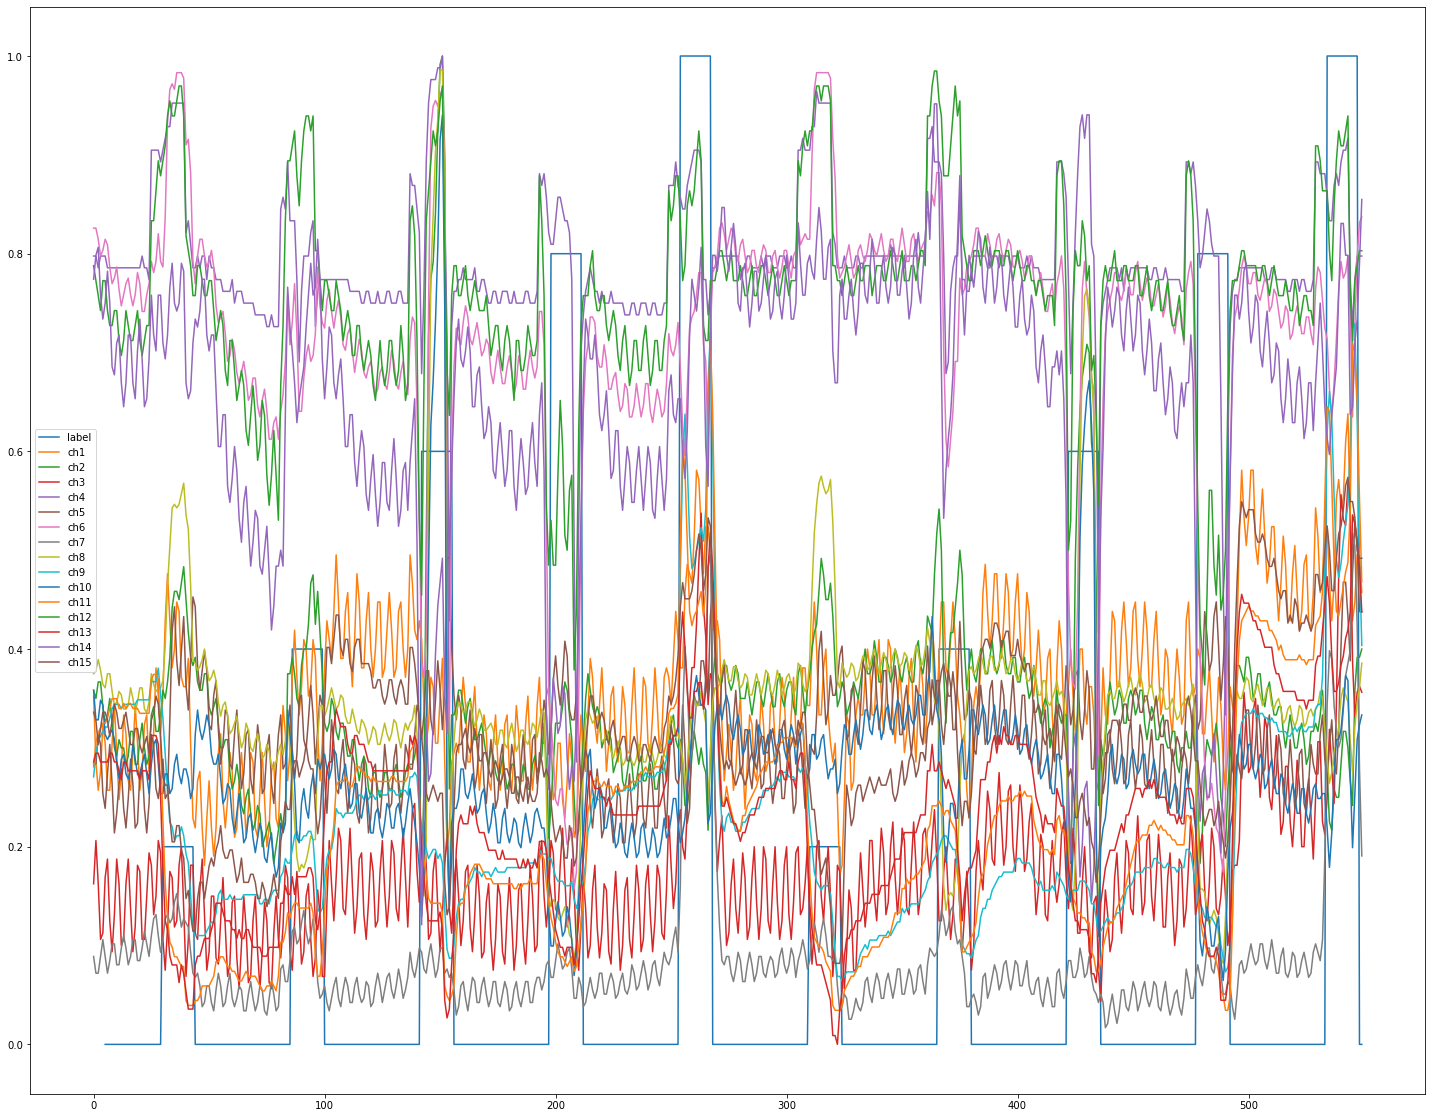

In [139]:
plotting_data = data_scaled.iloc[:550]
time_array = plotting_data.index
plt.figure(figsize = (25,20))
plt.plot(time_array, plotting_data['label'].shift(5), label = 'label')
plotting_data = plotting_data.iloc[:,0:15]
# plotting_data = plotting_data.drop(columns=['label'])
for column in plotting_data.columns:
    plt.plot(time_array, plotting_data[column], label=column)

plt.legend();

In [130]:
data = pd.read_csv('../data/train_file.csv')
data = data.drop(columns=['timestamp_milllisecs'])

train_size=0.805
X = data.drop(columns=['label'])
y = data['label']

x_train, y_train, x_test, y_test = split_data(X,y,train_size)
x_train_new = feature_engineering(x_train)
x_test_new = feature_engineering(x_test)

sample_weight = get_sample_weights(y_train)

n_shifts = 5
y_train = y_train.shift(n_shifts).fillna(0)

In [131]:
model = XGBClassifier()
model.fit(x_train_new, y_train, sample_weight=sample_weight)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4379
         1.0       1.00      1.00      1.00       294
         2.0       1.00      1.00      1.00       294
         3.0       1.00      1.00      1.00       294
         4.0       1.00      1.00      1.00       294
         5.0       1.00      1.00      1.00       280

    accuracy                           1.00      5835
   macro avg       1.00      1.00      1.00      5835
weighted avg       1.00      1.00      1.00      5835

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1064
           1       0.92      0.87      0.90        70
           2       0.87      0.87      0.87        70
           3       0.85      0.90      0.88        70
           4       0.96      0.74      0.84        70
           5       0.90      0.94      0.92        70

    accuracy                           0.95      1414
   macro avg       0.91

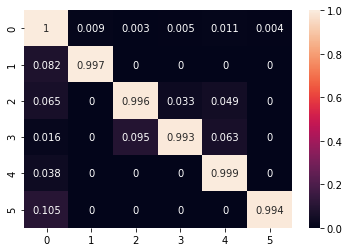

In [132]:
preds = pd.Series(model.predict(x_test_new))
preds = preds.shift(-n_shifts).fillna(0)
# preds = rolling_mode(preds)

print(classification_report(y_train, model.predict(x_train_new)))
print(classification_report(y_test, preds))
cm = confusion_matrix(preds, y_test)
cm = sklearn.preprocessing.normalize(cm)
cm = np.round(cm, decimals=3)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);


In [129]:
preds.rolling(window=5).apply(lambda x: stats.mode(x)[0])

AttributeError: 'list' object has no attribute 'rolling'

In [118]:
def rolling_mode(arr, window=5):
    arr = [i.tolist() for i in arr.rolling(window=5)]
    mode_values = []
    for i in arr:
    #     print(stats.mode(i))
        vals,counts = np.unique(i, return_counts=True)
        index = np.argmax(counts)
        mode_values.append(vals[index])
        
    return mode_values
    



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 5]
[0, 0, 0, 5, 5]
[0, 0, 5, 5, 5]
[0, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 0]
[5, 5, 5, 0, 5]
[5, 5, 0, 5, 5]
[5, 0, 5, 5, 5]
[0, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 5]
[5, 5, 5, 5, 0]
[5, 5, 5, 0, 0]
[5, 5, 0, 0, 0]
[5, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0,

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 4]
[0, 0, 0, 4, 3]
[0, 0, 4, 3, 3]
[0, 4, 3, 3, 3]
[4, 3, 3, 3, 3]
[3, 3, 3, 3, 0]
[3, 3, 3, 0, 0]
[3, 3, 0, 0, 0]
[3, 0, 0, 0, 0]
[0, 0, 0, 0, 2]
[0, 0, 0, 2, 2]
[0, 0, 2, 2, 2]
[0, 2, 2, 2, 0]
[2, 2, 2, 0, 0]
[2, 2, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0

In [99]:
np.array([1,2,3,4,4]).mode()

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

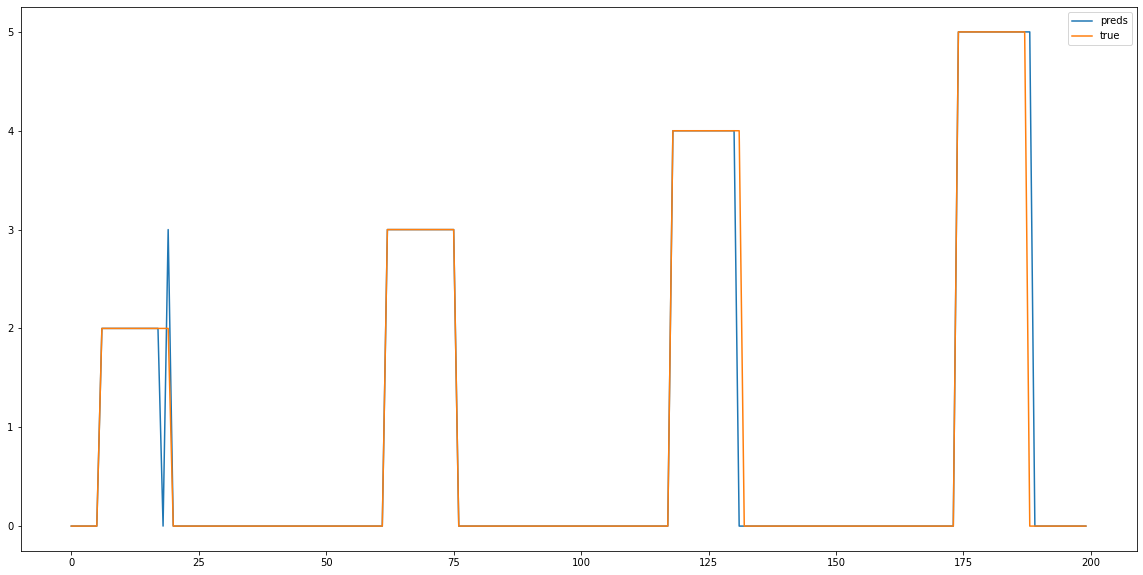

In [135]:
T = (400,600)

plt.figure(figsize=(20,10))
plt.plot(range(len(preds[T[0]:T[1]])), preds[T[0]:T[1]], label='preds')
plt.plot(range(len(y_test[T[0]:T[1]])), y_test[T[0]:T[1]], label='true')
plt.legend();

In [ ]:

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
keys

In [ ]:
def filter_data(data):
    for column_name in data.columns:
        if column_name == 'ch1':
            filtered_col = efefefefef
        elif column_name =='ch1':
            bewkfuewhfiewufu
            
        
        data.append(filtered_col)
            
        
    
    